In [32]:
import pandas as pd
import numpy as np
# библиотеки для графиков
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
#считывание данных

nh3_2rh_25t = pd.read_excel('Данные для МО/NH3_100_200_300_500 ppm.xlsx', sheet_name='Untitled')
no2_2rh_25t = pd.read_excel('Данные для МО/NO2_2_5_10 ppm_ RH_2%.xlsx', sheet_name='Untitled')
no2_25rh_25t = pd.read_excel('Данные для МО/NO2_2_5_10 ppm_RH_25%.xlsx', sheet_name='Untitled')
no2_50rh_25t = pd.read_excel('Данные для МО/NO2_2_5_10 ppm_RH_50%.xlsx', sheet_name='Untitled')
no2_75rh_25t = pd.read_excel('Данные для МО/NO2_2_5_10 ppm_RH_75%.xlsx', sheet_name='Untitled')

In [34]:
# nh3_2rh_25t = nh3_2rh_25t.iloc[1:]
# no2_2rh_25t = no2_2rh_25t.iloc[1:]
# no2_25rh_25t = no2_25rh_25t.iloc[1:]
# no2_50rh_25t = no2_50rh_25t.iloc[1:]
# no2_75rh_25t = no2_75rh_25t.iloc[1:]

# nh3_2rh_25t

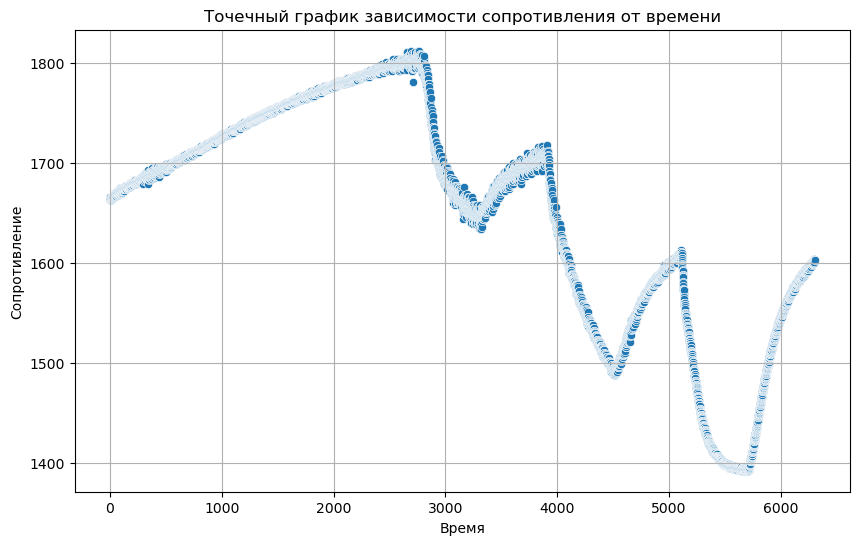

In [35]:
def dependency_graphs(gas):
    gas = gas.iloc[1:]
    # Построим точечный график
    plt.figure(figsize=(10, 6))# размер графика
    sns.scatterplot(x='Time [с]', y='R [Ом]', data=gas)# что и откуда берем

    plt.xlabel('Время')#ну как бы просто название
    plt.ylabel('Сопротивление')#название игрека
    plt.title('Точечный график зависимости сопротивления от времени')
    plt.grid(True)#добавим сеточку

    return plt.show()
dependency_graph = dependency_graphs(no2_75rh_25t)

In [36]:
#функция для обработки - добавим отдельный столбик с температурой(25), с относительнеой влажностью(для каждого файла она своя, но постоянная)
def temperature_and_RH(df,t,rh):
    df['temperature[°C]'] = t
    df['RH[%]']=rh
    return df

nh3_2rh_25t = temperature_and_RH(nh3_2rh_25t,25,2)
no2_2rh_25t = temperature_and_RH(no2_2rh_25t,25,2)
no2_25rh_25t = temperature_and_RH(no2_25rh_25t,25,25)
no2_50rh_25t = temperature_and_RH(no2_50rh_25t,25,50)
no2_75rh_25t = temperature_and_RH(no2_75rh_25t,25,75)
no2_75rh_25t

,R [Ом],Time [с],temperature[°C],RH[%]
0,0.000000,0.0,25,75
1,1662.937744,0.5,25,75
2,1663.950073,1.0,25,75
3,1666.321777,1.5,25,75
4,1664.376953,2.0,25,75
...,...,...,...,...
12595,1599.931519,6300.0,25,75
12596,1603.424072,6300.5,25,75
12597,1602.138062,6301.0,25,75
12598,1600.826782,6301.5,25,75


In [37]:
#функция для вычисления sin_time и cos_time (период где-то 1000с?) по крайней мере у аммиака
def sin_time_and_cos_time(df, time_column,R_column):
    df['period'] = df[R_column].diff()
    #чтобы не появлялось нанов в столбцах с косинусом и синусом
    df.dropna(subset=['period'], inplace=True)

    df['sin_time'] = np.sin(2 * np.pi * df[time_column] / df['period'])
    df['cos_time'] = np.cos(2 * np.pi * df[time_column] / df['period'])

#удаляем временный столбец 'period'
    df.drop('period', axis=1, inplace=True)
    return df
nh3_2rh_25t = sin_time_and_cos_time(nh3_2rh_25t,'Time [с]','R [Ом]')
no2_2rh_25t  = sin_time_and_cos_time(no2_2rh_25t,'Time [с]','R [Ом]')
no2_25rh_25t = sin_time_and_cos_time(no2_25rh_25t,'Time [с]','R [Ом]')
no2_50rh_25t = sin_time_and_cos_time(no2_50rh_25t,'Time [с]','R [Ом]')
no2_75rh_25t = sin_time_and_cos_time(no2_75rh_25t,'Time [с]','R [Ом]')

nh3_2rh_25t

c:\Users\katya\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in sin
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\katya\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in cos
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\katya\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in sin
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\katya\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in cos
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\katya\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in sin
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\katya\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in cos
  r

,R [Ом],Time [с],temperature[°C],RH[%],sin_time,cos_time
1,1916.370361,0.5,25,2,0.001639,0.999999
2,1917.799194,1.0,25,2,-0.950807,-0.309783
3,1914.129395,1.5,25,2,-0.542486,-0.840065
4,1916.431519,2.0,25,2,-0.734267,0.678860
5,1915.614380,2.5,25,2,-0.364946,0.931029
...,...,...,...,...,...,...
13193,1981.473877,6599.5,25,2,-0.872428,-0.488743
13194,1978.415039,6600.0,25,2,0.910567,-0.413361
13195,1980.380371,6600.5,25,2,0.214524,-0.976719
13196,1979.619629,6601.0,25,2,-0.324699,0.945817
